epoch 1, loss 7610.16064453125
epoch 2, loss 7576.3369140625
epoch 3, loss 7542.6787109375
epoch 4, loss 7509.1884765625
epoch 5, loss 7475.85986328125
epoch 6, loss 7442.6962890625
epoch 7, loss 7409.6953125
epoch 8, loss 7376.8564453125
epoch 9, loss 7344.17822265625
epoch 10, loss 7311.65966796875
epoch 11, loss 7279.2978515625
epoch 12, loss 7247.09765625
epoch 13, loss 7215.0546875
epoch 14, loss 7183.169921875
epoch 15, loss 7151.43896484375
epoch 16, loss 7119.86181640625
epoch 17, loss 7088.4404296875
epoch 18, loss 7057.171875
epoch 19, loss 7026.0537109375
epoch 20, loss 6995.08544921875
epoch 21, loss 6964.26953125
epoch 22, loss 6933.6005859375
epoch 23, loss 6903.08203125
epoch 24, loss 6872.7099609375
epoch 25, loss 6842.4853515625
epoch 26, loss 6812.40478515625
epoch 27, loss 6782.4677734375
epoch 28, loss 6752.6787109375
epoch 29, loss 6723.03369140625
epoch 30, loss 6693.53076171875
epoch 31, loss 6664.16943359375
epoch 32, loss 6634.94775390625
epoch 33, loss 6605.86

epoch 447, loss 1159.289306640625
epoch 448, loss 1154.52734375
epoch 449, loss 1149.7855224609375
epoch 450, loss 1145.063720703125
epoch 451, loss 1140.36181640625
epoch 452, loss 1135.6788330078125
epoch 453, loss 1131.0155029296875
epoch 454, loss 1126.3714599609375
epoch 455, loss 1121.746826171875
epoch 456, loss 1117.141357421875
epoch 457, loss 1112.55517578125
epoch 458, loss 1107.9879150390625
epoch 459, loss 1103.439208984375
epoch 460, loss 1098.90966796875
epoch 461, loss 1094.3995361328125
epoch 462, loss 1089.90771484375
epoch 463, loss 1085.434326171875
epoch 464, loss 1080.9793701171875
epoch 465, loss 1076.54345703125
epoch 466, loss 1072.12548828125
epoch 467, loss 1067.725830078125
epoch 468, loss 1063.3446044921875
epoch 469, loss 1058.9810791015625
epoch 470, loss 1054.6358642578125
epoch 471, loss 1050.3089599609375
epoch 472, loss 1046.000244140625
epoch 473, loss 1041.709228515625
epoch 474, loss 1037.4361572265625
epoch 475, loss 1033.1805419921875
epoch 476, 

epoch 944, loss 153.92381286621094
epoch 945, loss 153.31211853027344
epoch 946, loss 152.70301818847656
epoch 947, loss 152.09645080566406
epoch 948, loss 151.49232482910156
epoch 949, loss 150.89077758789062
epoch 950, loss 150.29156494140625
epoch 951, loss 149.69485473632812
epoch 952, loss 149.10060119628906
epoch 953, loss 148.5087127685547
epoch 954, loss 147.91934204101562
epoch 955, loss 147.33230590820312
epoch 956, loss 146.74778747558594
epoch 957, loss 146.16567993164062
epoch 958, loss 145.58592224121094
epoch 959, loss 145.008544921875
epoch 960, loss 144.43357849121094
epoch 961, loss 143.86099243164062
epoch 962, loss 143.29063415527344
epoch 963, loss 142.72279357910156
epoch 964, loss 142.15721130371094
epoch 965, loss 141.59396362304688
epoch 966, loss 141.032958984375
epoch 967, loss 140.47434997558594
epoch 968, loss 139.9180450439453
epoch 969, loss 139.364013671875
epoch 970, loss 138.81227111816406
epoch 971, loss 138.26272583007812
epoch 972, loss 137.71553039

epoch 1444, loss 24.0477352142334
epoch 1445, loss 23.969636917114258
epoch 1446, loss 23.891845703125
epoch 1447, loss 23.814367294311523
epoch 1448, loss 23.73723602294922
epoch 1449, loss 23.660436630249023
epoch 1450, loss 23.583898544311523
epoch 1451, loss 23.50768280029297
epoch 1452, loss 23.43178939819336
epoch 1453, loss 23.356189727783203
epoch 1454, loss 23.280929565429688
epoch 1455, loss 23.20595932006836
epoch 1456, loss 23.13129997253418
epoch 1457, loss 23.056970596313477
epoch 1458, loss 22.982954025268555
epoch 1459, loss 22.909208297729492
epoch 1460, loss 22.83576774597168
epoch 1461, loss 22.76263999938965
epoch 1462, loss 22.689823150634766
epoch 1463, loss 22.617307662963867
epoch 1464, loss 22.545045852661133
epoch 1465, loss 22.47312355041504
epoch 1466, loss 22.401504516601562
epoch 1467, loss 22.330156326293945
epoch 1468, loss 22.259090423583984
epoch 1469, loss 22.18831443786621
epoch 1470, loss 22.117855072021484
epoch 1471, loss 22.047691345214844
epoch 

epoch 1955, loss 7.350462436676025
epoch 1956, loss 7.340917587280273
epoch 1957, loss 7.331416130065918
epoch 1958, loss 7.321961402893066
epoch 1959, loss 7.312539100646973
epoch 1960, loss 7.303150653839111
epoch 1961, loss 7.293822765350342
epoch 1962, loss 7.284498691558838
epoch 1963, loss 7.2752485275268555
epoch 1964, loss 7.266015529632568
epoch 1965, loss 7.256826400756836
epoch 1966, loss 7.247662544250488
epoch 1967, loss 7.238545894622803
epoch 1968, loss 7.229471206665039
epoch 1969, loss 7.220420837402344
epoch 1970, loss 7.211414337158203
epoch 1971, loss 7.202452182769775
epoch 1972, loss 7.193517208099365
epoch 1973, loss 7.184631824493408
epoch 1974, loss 7.175784111022949
epoch 1975, loss 7.166957378387451
epoch 1976, loss 7.158186912536621
epoch 1977, loss 7.14943265914917
epoch 1978, loss 7.1407318115234375
epoch 1979, loss 7.132054805755615
epoch 1980, loss 7.123420238494873
epoch 1981, loss 7.114819049835205
epoch 1982, loss 7.106253623962402
epoch 1983, loss 7.

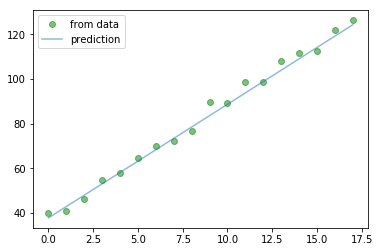

OrderedDict([('linear.weight', tensor([[5.0860]])), ('linear.bias', tensor([37.7423]))])


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable


# Define Data
x_train = np.asarray([[1],[2],[1],[1],[4],[3]],dtype = np.uint8)
y_correct =  np.asarray([[3],[6],[6],[4],[12],[9]],dtype = np.uint8)

# Define Data 2
domain_size = 18
x_train = np.arange(domain_size,dtype=np.float64)
x_train = np.reshape(x_train, (domain_size,1))
error = (np.random.rand(x_train.shape[0],x_train.shape[1])-0.5) *10
bias = 40
y_correct = x_train * 5  + error + bias


class MyLinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__() 
        # Calling Super Class's constructor
        self.linear = nn.Linear(input_dim, output_dim)
        # nn.linear is defined in nn.Module

    def forward(self, x):
        # Here the forward pass is simply a linear function

        out = self.linear(x)
        return out

input_dim = 1
output_dim = 1

###################################################################
#  TRAINING
###################################################################
model = MyLinearRegressionModel(input_dim,output_dim)

criterion = nn.MSELoss()# Mean Squared Loss
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) #Stochastic Gradient Descent
epochs = 2000
for epoch in range(epochs):

    epoch +=1
    #increase the number of epochs by 1 every time

    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_correct))

    #clear grads as discussed in prev post

    optimiser.zero_grad()

    #forward to get predicted values

    outputs = model.forward(inputs.float())
    loss = criterion(outputs, labels.float())
    loss.backward()# back props
    optimiser.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.data))
    

    
predicted = model.forward(Variable(torch.from_numpy(x_train)).float()).data.numpy()

plt.plot(x_train, y_correct, 'go', label = 'from data', alpha = .5)
plt.plot(x_train, predicted, label = 'prediction', alpha = 0.5)
plt.legend()
plt.show()
print(model.state_dict())

In [4]:
###################################################################
# How to save a trained model
###################################################################
save_model = False
if save_model is True:
    # Saves only parameters
    # alpha & beta
    torch.save(model.state_dict(), 'awesome_linear_model.pkl')


In [5]:
###################################################################
# How to load a trained model
###################################################################
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_linear_model.pkl'))

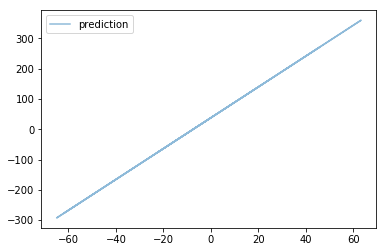

In [41]:
###################################################################
# How to use the model on new data
###################################################################

model.eval()
x = np.random.randn(10,1)*59 +10
data = Variable(torch.from_numpy(x)).float()
output = model.forward(data)
prediction = torch.argmax(output)
predicted = prediction.data.numpy()
predicted = model.forward(Variable(torch.from_numpy(x)).float()).data.numpy()
plt.plot(x, predicted, label = 'prediction', alpha = 0.5)
plt.legend()
plt.show()

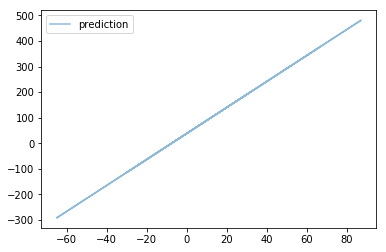

In [40]:
predicted = model.forward(Variable(torch.from_numpy(x)).float()).data.numpy()
plt.plot(x, predicted, label = 'prediction', alpha = 0.5)
plt.legend()
plt.show()

In [27]:
predicted = model.forward(Variable(torch.from_numpy(x)).float()).data.numpy()


In [28]:
print(predicted)

[[226.51616]
 [248.94244]
 [230.5527 ]
 [222.78906]
 [239.58464]
 [244.36916]
 [243.83514]
 [206.90773]
 [275.4383 ]
 [246.8893 ]
 [222.64267]
 [234.24338]
 [208.6091 ]
 [249.21198]
 [264.53607]
 [231.24182]
 [232.0877 ]
 [259.431  ]
 [272.6664 ]
 [222.84267]
 [239.87796]
 [191.47878]
 [248.31996]
 [263.0032 ]
 [242.845  ]
 [232.71904]
 [255.90149]
 [240.53331]
 [182.01057]
 [249.00311]
 [252.79057]
 [213.49811]
 [256.94757]
 [189.48648]
 [219.66385]
 [262.94174]
 [232.18016]
 [278.04526]
 [255.18692]
 [235.60031]
 [275.40018]
 [281.96533]
 [238.69615]
 [233.03662]
 [225.47522]
 [231.10999]
 [244.08482]
 [249.70836]
 [203.56915]
 [259.08142]
 [270.5039 ]
 [249.08858]
 [224.10036]
 [264.26718]
 [207.31935]
 [273.9639 ]
 [240.39229]
 [254.23427]
 [232.52345]
 [190.04642]
 [226.79132]
 [207.3981 ]
 [288.69473]
 [304.09793]
 [231.51065]
 [235.57964]
 [233.62271]
 [277.0305 ]
 [243.40186]
 [253.35997]
 [210.06532]
 [282.40604]
 [258.35178]
 [245.28976]
 [237.51361]
 [221.85799]
 [241.39987]

In [25]:
x


array([[37.11644426],
       [41.52586645],
       [37.91010298],
       [36.38363043],
       [39.68595242],
       [40.62667398],
       [40.52168019],
       [33.26106123],
       [46.73544518],
       [41.12218063],
       [36.35484166],
       [38.63575651],
       [33.59558667],
       [41.57886244],
       [44.59186579],
       [38.0455966 ],
       [38.21191363],
       [43.58811149],
       [46.19044001],
       [36.39417027],
       [39.74362011],
       [30.22744655],
       [41.40347497],
       [44.29047405],
       [40.32699495],
       [38.33604494],
       [42.89414786],
       [39.87247561],
       [28.36581986],
       [41.53779467],
       [42.28248343],
       [34.556854  ],
       [43.09982565],
       [29.83572249],
       [35.76915377],
       [44.27838714],
       [38.23008928],
       [47.24801872],
       [42.75364539],
       [38.90255611],
       [46.72794946],
       [48.01878282],
       [39.51125844],
       [38.39848584],
       [36.91177719],
       [38

In [26]:
prediction

tensor(63)